# Exercise 2

In [28]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

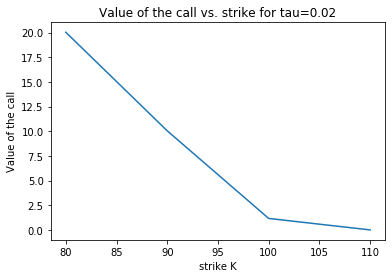

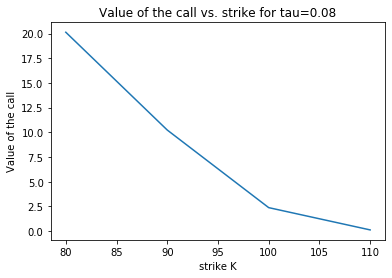

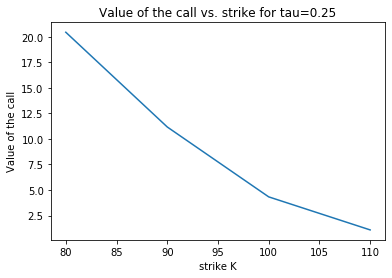

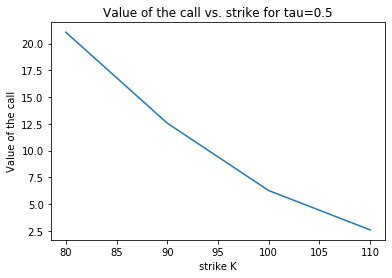

In [29]:
def fact(n):
    return np.math.factorial(n)

iterations=40
lambd = 0.2
gamma = -0.08
sigma = 0.2
r = 0.04
T = [ 0.02,0.08,0.25,0.5 ]
S0 = 100
K = [80,90,100,110]


def N(x):
    return norm.cdf(x)

def C(K,T):
    res = 0
    for i in range(iterations):
        dplus_i =   ( np.log( S0 * (1+gamma)**i / K ) + (r+sigma**2/2)* T ) / ( sigma * np.sqrt(T) )
        dminus_i =  ( np.log( S0 * (1+gamma)**i / K ) + (r-sigma**2/2)* T ) / ( sigma * np.sqrt(T) )
        res += np.exp(-lambd * T ) * (lambd*T)**i / fact(i) *  \
                 ( S0 * (1+gamma)**i * N (dplus_i)  - np.exp(-r*T) * K * N(dminus_i) )
    return res

Cv= np.vectorize(C)



for expiration in T:
    plt.figure()
    Y = Cv(K, expiration)
    plt.plot(K, Y)
    plt.xlabel('strike K')
    plt.ylabel('Value of the call')
    plt.title('Value of the call vs. strike for tau='+str(expiration))
    plt.show()